<a href="https://colab.research.google.com/github/ABIR200406/CODSOFT/blob/main/CodSoft__Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Reading of the csv file.
data=pd.read_csv('/content/fraudTrain.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62256 entries, 0 to 62255
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             62256 non-null  int64  
 1   trans_date_trans_time  62256 non-null  object 
 2   cc_num                 62256 non-null  int64  
 3   merchant               62256 non-null  object 
 4   category               62256 non-null  object 
 5   amt                    62256 non-null  float64
 6   first                  62256 non-null  object 
 7   last                   62256 non-null  object 
 8   gender                 62256 non-null  object 
 9   street                 62256 non-null  object 
 10  city                   62256 non-null  object 
 11  state                  62256 non-null  object 
 12  zip                    62256 non-null  int64  
 13  lat                    62256 non-null  float64
 14  long                   62256 non-null  float64
 15  ci

In [8]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [9]:
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
62251,62251,2019-02-05 23:59:58,4412720572684931,"fraud_Schiller, Blanda and Johnson",home,53.37,Richard,Marshall,M,295 Page Creek Suite 181,...,37.7681,-75.6664,776,Psychiatrist,1949-11-17,a117142e505c928f60a44617a8cb9212,1.328486e+09,38.614949,-75.269499,0.0
62252,62252,2019-02-06 00:00:06,4797297220948468262,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,40.56,Erica,Briggs,F,3310 Davidson Spurs Apt. 107,...,38.8938,-86.5246,1228,Counsellor,1991-03-13,56885314e534602c2ab8bed2ef237d4c,1.328486e+09,39.665993,-86.739559,0.0
62253,62253,2019-02-06 00:02:54,6011366578560244,"fraud_Raynor, Feest and Miller",gas_transport,81.50,Adam,Stark,M,0912 Mark Fields Apt. 080,...,40.5046,-77.7186,4653,Nutritional therapist,1997-07-01,3f47a9d378a07b15da283f43161467ea,1.328487e+09,40.871729,-78.688515,0.0
62254,62254,2019-02-06 00:06:43,4239436242473,"fraud_Christiansen, Goyette and Schamberger",gas_transport,56.49,James,Leon,M,826 Benjamin Stravenue,...,38.8320,-77.1200,321490,"Scientist, biomedical",1991-10-04,9d1b8a7a381971e57123f3c8fda06b73,1.328487e+09,38.953980,-77.185126,0.0
62255,62255,2019-02-06 00:08:10,2720830304681674,fraud_Morar Inc,grocery_net,52.16,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,47690e3e6ba,NaN,NaN,NaN,NaN


In [10]:
# Checking for null value
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [12]:
data.shape

(62256, 23)

<Axes: xlabel='is_fraud'>

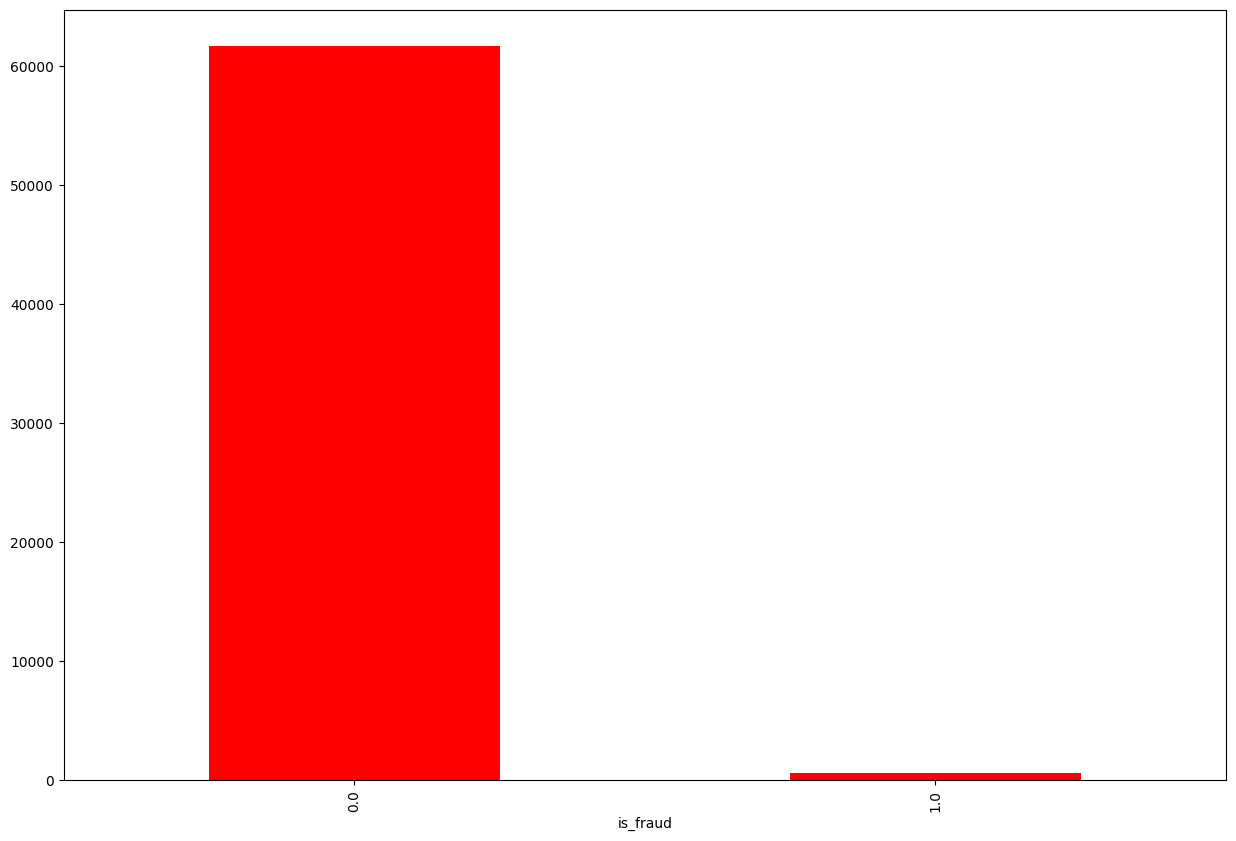

In [15]:
# plot
fraud_count = data ['is_fraud']
fraud_count.value_counts().plot(kind="bar",figsize=(15,10),color='red')

In [16]:
# dropping the irrelevent columns
data.drop(columns=['Unnamed: 0','trans_num','merch_lat','merch_long','trans_date_trans_time','dob'],inplace=True)

In [18]:
# label
print("Normal Transactions count(%) :",(data['is_fraud'].value_counts()[0]/data.shape[0])*100,'%')
print("Fraud Transactions count(%)  :",(data['is_fraud'].value_counts()[1]/data.shape[0])*100,'%')


Normal Transactions count(%) : 99.06675661783602 %
Fraud Transactions count(%)  : 0.9316371112824468 %


In [26]:
# description of the datset
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,is_fraud
count,6.225600e+04,62256.000000,62256.000000,62256.000000,62256.000000,6.225600e+04,6.225500e+04,62255.000000
mean,4.233146e+17,71.536326,48664.939652,38.528040,-90.178475,8.966283e+04,1.326963e+09,0.009317
std,1.317530e+18,152.861065,26948.620604,5.083055,13.841213,3.022644e+05,9.112453e+05,0.096072
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,0.000000
25%,1.800429e+14,9.690000,25526.000000,34.620500,-96.786900,7.430000e+02,1.326153e+09,0.000000
50%,3.519607e+15,47.860000,48088.000000,39.354300,-87.456900,2.463500e+03,1.326990e+09,0.000000
75%,4.642255e+15,83.520000,72011.000000,41.846700,-80.124800,2.112500e+04,1.327761e+09,0.000000
max,4.992346e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.328487e+09,1.000000


In [27]:
# getting unique values by column wise
def unique(columns):
  for col in columns:
    print('Column Name :',col)
    print('Unique Values :',int(data[f'{col}'].nunique()))

In [28]:

unique(list(data.columns))

Column Name : cc_num
Unique Values : 914
Column Name : merchant
Unique Values : 693
Column Name : category
Unique Values : 14
Column Name : amt
Unique Values : 17754
Column Name : first
Unique Values : 338
Column Name : last
Unique Values : 467
Column Name : gender
Unique Values : 2
Column Name : street
Unique Values : 914
Column Name : city
Unique Values : 840
Column Name : state
Unique Values : 50
Column Name : zip
Unique Values : 903
Column Name : lat
Unique Values : 901
Column Name : long
Unique Values : 902
Column Name : city_pop
Unique Values : 825
Column Name : job
Unique Values : 476
Column Name : unix_time
Unique Values : 61529
Column Name : is_fraud
Unique Values : 2


In [29]:
#Encoding the Categorial Values
cat_var = ['merchant','category','first','last','gender','street','city','state','zip','job']

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
encoder = LabelEncoder()
for col in cat_var:
  data[f'{col}'] = encoder.fit_transform(data[f'{col}'])


In [33]:
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,is_fraud
0,2703186189652095,514,8,4.97,152,18,0,530,495,26,242,36.0788,-81.1781,3495,357,1.325376e+09,0.0
1,630423337322,241,4,107.23,296,155,0,410,570,46,899,48.8878,-118.2105,149,412,1.325376e+09,0.0
2,38859492057661,390,0,220.11,105,373,1,563,441,12,800,42.1808,-112.2620,4154,295,1.325376e+09,0.0
3,3534093764340240,360,2,45.00,153,449,1,865,81,25,570,46.2306,-112.1138,1939,316,1.325376e+09,0.0
4,375534208663984,297,9,41.96,322,147,1,395,204,44,211,38.4207,-79.4629,99,111,1.325376e+09,0.0


In [34]:
# Removing unwanted columns identified from above heatmap
data.drop(columns=['cc_num','merchant','street','state','first','last','long','lat','job','unix_time','city_pop'],inplace=True)
data.head()

,category,amt,gender,city,zip,is_fraud
0,8,4.97,0,495,242,0.0
1,4,107.23,0,570,899,0.0
2,0,220.11,1,441,800,0.0
3,2,45.00,1,81,570,0.0
4,9,41.96,1,204,211,0.0


In [35]:
# Features and target spliting
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [36]:
# spliting the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("Training sample size :",X_train.shape)
print("Test sample size :",X_test.shape)

Training sample size : (49804, 5)
Test sample size : (12452, 5)


In [38]:
# Impute missing values in the target variable 'is_fraud'
# For example, fill missing values with the most frequent value
y_train.fillna(y_train.mode()[0], inplace=True)

Logistic Regression

In [39]:
# Now, try fitting the model again
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
print("Training set accuracy :",model_lr.score(X_train,y_train))
print("Test set accuracy :",model_lr.score(X_test,y_test))

Training set accuracy : 0.9895189141434423
Test set accuracy : 0.9897205268230003


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Decision Tree

In [43]:
model_dtc = DecisionTreeClassifier(max_depth=20)
model_dtc.fit(X_train,y_train)
print('Training set Score :',model_dtc.score(X_train,y_train))
print('Test set Score :',model_dtc.score(X_test,y_test))

Training set Score : 0.9998594490402377
Test set Score : 0.9942177963379377


Random Forest Classification

In [44]:
model_rfc = RandomForestClassifier(n_estimators=20,max_depth=20)
model_rfc.fit(X_train,y_train)
print('Training set Score :',model_rfc.score(X_train,y_train))
print('Test set Score :',model_rfc.score(X_test,y_test))

Training set Score : 0.9997791342060879
Test set Score : 0.9967073562479923


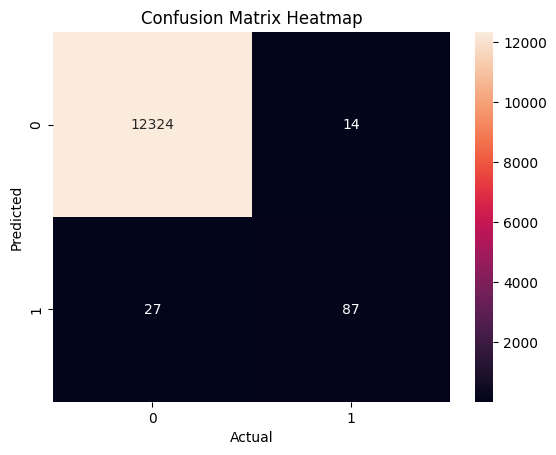

In [45]:
# Confusion Matrix
y_pred = model_rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [46]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12338
         1.0       0.86      0.76      0.81       114

    accuracy                           1.00     12452
   macro avg       0.93      0.88      0.90     12452
weighted avg       1.00      1.00      1.00     12452



# Conclusion
Ramdom Forest is more precise than logistic regression and Decision tree as it has more accuracy_score than other two

So we can concluded that we can use random forest for card fraud detection.